# Startup Funding Analysis

### This dataset has funding information of the Indian startups from January 2015 to 2018/2019 . It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD).

### We are going to clean the data and try to some questions regarding the startup-ecosystem in India.

- Do cities play a major role in funding?
- Which industries are favored by investors for funding?
- Who are the important investors in the Indian Ecosystem?
- How much funds does startups generally get in India?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process
import chardet
import warnings
color = sns.color_palette()

In [3]:
start = pd.read_csv('startup_funding.csv',encoding='UTF-8-SIG')

In [121]:
start.head()

,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,Investment Type,Amount in USD
0,2020-09-01,BYJU’S,e-tech,E-learning,bangalore,tiger global management,Private Equity Round,"20,00,00,000"
1,2020-01-13,Shuttl,transportation,App based shuttle service,gurgaon,susquehanna growth equity,Series C,"80,48,394"
2,2020-09-01,Mamaearth,e-commerce,Retailer of baby and toddler products,bangalore,sequoia capital india,Series B,"1,83,58,860"
3,2020-02-01,https://www.wealthbucket.in/,fintech,Online Investment,new delhi,vinod khatumal,Pre-series A,"30,00,000"
4,2020-02-01,Fashor,fashion and apparel,Embroiled Clothes For Women,mumbai,sprout venture partners,Seed Round,"18,00,000"


In [130]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date               3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


## Data Cleaning

In [5]:
start.Remarks.isnull().value_counts()

True     2625
False     419
Name: Remarks, dtype: int64

In [6]:
start.drop(['Remarks'], axis=1,inplace=True)

In [7]:
start.drop(['Sr No'], axis=1,inplace=True)

In [8]:
start.rename(columns={'Date dd/mm/yyyy':'Date'},inplace=True)
start.rename(columns={'City  Location':'City Location'},inplace=True)
start.rename(columns={'InvestmentnType':'Investment Type'},inplace=True)

In [9]:
start.loc[192,'Date']='05/07/2018'
start.loc[2571,'Date']='01/07/2015'
start.loc[2606,'Date']='10/07/2015'
start.loc[3029,'Date']='22/01/2015'
start.loc[2775,'Date']='22/01/2015'
start.loc[3029,'Date']='22/01/2015'

In [10]:
start.Date=pd.to_datetime(start.Date,format='%d/%m/%Y',infer_datetime_format=True)

**The Data cleaning is not fully done but will continue to do it as we try to answer some questions below.** 

## Do cities play a major role in funding?

In [12]:
start['City Location']=start['City Location'].str.lower()
start['City Location']=start['City Location'].str.strip()

In [19]:
city=start['City Location'].dropna().unique()
city.sort()
city

array(['agra', 'ahemadabad', 'ahemdabad', 'ahmedabad', 'amritsar',
       'andheri', 'bangalore', 'bangalore / palo alto',
       'bangalore / san mateo', 'bangalore / sfo', 'bangalore / usa',
       'bangalore/ bangkok', 'belgaum', 'bengaluru and gurugram',
       'bhopal', 'bhubaneswar', 'bhubneswar', 'boston', 'burnsville',
       'california', 'chandigarh', 'chembur', 'chennai',
       'chennai/ singapore', 'coimbatore', 'dallas / hyderabad', 'delhi',
       'delhi & cambridge', 'faridabad', 'gaya', 'goa', 'goa/hyderabad',
       'gurgaon', 'gurgaon / sfo', 'gurugram', 'gwalior', 'haryana',
       'hubli', 'hyderabad', 'hyderabad/usa', 'india', 'india / usa',
       'india/singapore', 'indore', 'jaipur', 'jodhpur', 'kanpur',
       'karnataka', 'karur', 'kerala', 'kochi', 'kolkata', 'kormangala',
       'kozhikode', 'london', 'lucknow', 'menlo park', 'missourie',
       'mumbai', 'mumbai / global', 'mumbai / ny', 'mumbai / uk',
       'mumbai/bengaluru', 'nagpur', 'nairobi', 'new d

In [17]:
start.loc[start['City Location']=='\\\\xc2\\\\xa0bangalore','City Location']='bangalore'
start.loc[start['City Location']=='\\\\xc2\\\\xa0gurgaon','City Location']='gurgaon'
start.loc[start['City Location']=='\\\\xc2\\\\xa0mumbai','City Location']='mumbai'
start.loc[start['City Location']=='\\\\xc2\\\\xa0new delhi','City Location']='new delhi'
start.loc[start['City Location']=='\\\\xc2\\\\xa0noida','City Location']='noida'
start.loc[start['City Location']=='kolkatta','City Location']  ='kolkata'
start.loc[start['City Location']=='us','City Location']   ='usa'
start.loc[start['City Location']=='india / us','City Location'] ='india / usa'
start.loc[start['City Location']=='usa/india','City Location'] ='india / usa'
start.loc[start['City Location']=='us/india','City Location'] ='india / usa'
start.loc[start['City Location']=='india/us','City Location'] ='india / usa'
start.loc[start['City Location']=='bengaluru','City Location'] ='bangalore'
warnings.filterwarnings('ignore')

In [21]:
location=start['City Location'].value_counts().head(15)

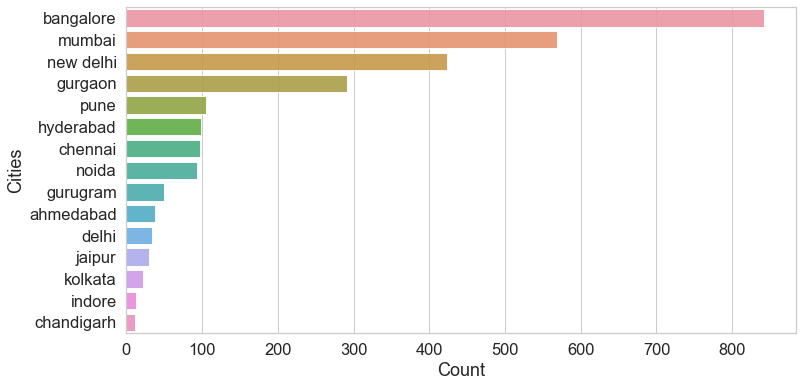

In [86]:
sns.set(font_scale=1.5) 
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.ylabel('Cities')
plt.xlabel('Count')
sns.barplot(location.values,location.index,  alpha=0.9);

**We can see that Banglore, Mumbai, New Delhi, Gurgaon, Pune, Hyderabad are the major cities for start ups in india.**

## Which industries are favored by investors for funding?

In [77]:
start['Industry Vertical']=start['Industry Vertical'].str.lower()
start['Industry Vertical']=start['Industry Vertical'].str.strip()
ind=start['Industry Vertical'].dropna().unique()

In [79]:
ind.sort()
ind[:30]

array(['360-degree view creating platform', '3d printer manufacturer',
       'accounting', 'activity based social network',
       'advertising & marketing community networking platform',
       'advertising, marketing', 'aerospace', 'affordable education',
       'affordable hotel booking online',
       'affordable personal healthcare products', 'agriculture', 'agtech',
       'ai', 'algorithmic match making platform',
       'alternate mobile monetization platform',
       'anonymous bulletin board app', 'api workflow platform',
       'app analytics platform', 'app based bus pooling services',
       'app based fitness coaching',
       'app security\\\\xc2\\\\xa0 testing platform',
       'architectural design & consulting', 'artificial intelligence',
       'artificial intelligence ecommerce chatbot',
       'artificial intelligence platform',
       'artist / designer marketplace', 'asset financing platform',
       'auto', 'auto insurance online platform',
       'auto ricksha

In [76]:
for i in range(2,12):
    index=ind[i].find("0")+1
    print(ind[i][index:])
    start.loc[start['Industry Vertical']==ind[i],'Industry Vertical']=ind[i][index:]

casual dining restaurant chain
contact center software platform
fashion info aggregator app
news aggregator mobile app
online grocery delivery
online jewellery store
online study notes marketplace
pre-school chain
premium loyalty rewards point management
warranty programs service administration


In [88]:
ind=start['Industry Vertical'].value_counts().head(10)

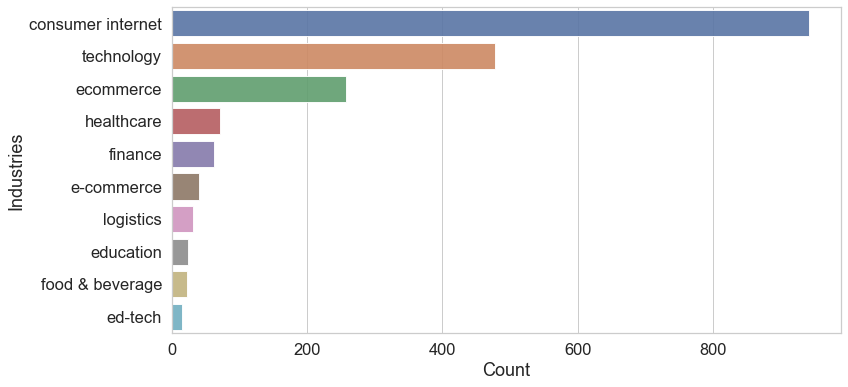

In [89]:
sns.set(font_scale=1.5) 
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.ylabel('Industries')
plt.xlabel('Count')
sns.barplot(ind.values,ind.index,  alpha=0.9);

**Industries like Consumer internet, Techonology, Ecommerce have the highest number of startups that are funded by Investers.**

## Who are the important investors in the Indian Ecosystem?

In [100]:
start['Investors Name']=start['Investors Name'].str.lower()
start['Investors Name']=start['Investors Name'].str.strip()
invest=start['Investors Name'].dropna().unique()

In [115]:
Investors=start['Investors Name'].value_counts().head(13)
Investors

undisclosed investors       120
indian Angel Network         26
ratan tata                   25
group of angel investors     20
kalaari capital              16
sequoia capital              15
accel partners               12
saif partners                12
brand capital                11
undisclosed                  11
venture catalysts            11
roundglass partners          10
info edge (india) ltd         9
Name: Investors Name, dtype: int64

In [103]:
matches = fuzzywuzzy.process.extract("kalaari capital", invest, limit=15, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('kalaari capital', 100),
 ('kae capital', 77),
 ('sri capital', 77),
 ('kstart capital', 76),
 ('parampara capital', 75),
 ('gaja capital', 74),
 ('valiant capital', 73),
 ('tr capital', 72),
 ('k2 capital', 72),
 ('sarva capital', 71),
 ('sequoia and kalaari capital.', 71),
 ('purvi capital', 71),
 ('kalaari capital, udayan goyal', 70),
 ('leo capital', 69),
 ('lok capital', 69)]

In [94]:
def replace_matches_in_column(df, column, string_to_match, min_ratio = 47):
    strings = df[column].unique()
    
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=15, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    rows_with_matches = df[column].isin(close_matches)
 
    df.loc[rows_with_matches, column] = string_to_match

    print("All done!")

In [104]:
replace_matches_in_column(df=start, column='Investors Name', string_to_match="undisclosed investors",min_ratio=72)
replace_matches_in_column(df=start, column='Investors Name', string_to_match="ratan tata",min_ratio=90)
replace_matches_in_column(df=start, column='Investors Name', string_to_match="indian Angel Network ",min_ratio=92)

All done!
All done!
All done!


In [116]:
del Investors['undisclosed investors']
del Investors['undisclosed']
del Investors['group of angel investors']

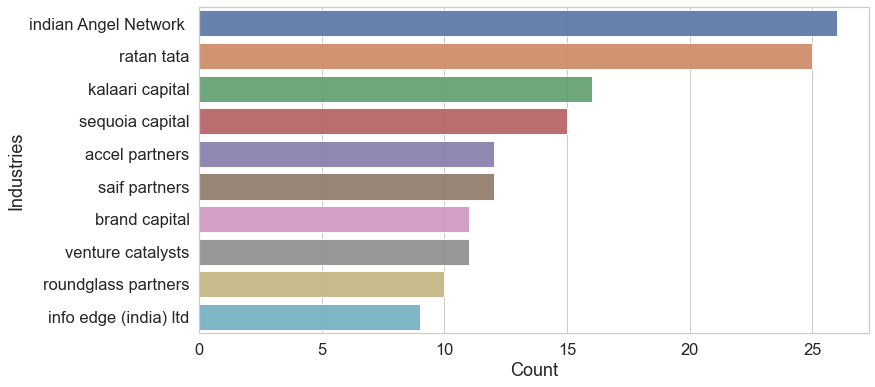

In [117]:
sns.set(font_scale=1.5) 
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.ylabel('Industries')
plt.xlabel('Count')
sns.barplot(Investors.values,Investors.index,  alpha=0.9);

**The major investors of indian startups are Indian Angel Network, Ratan Tata, Kalaari Capital.**

## How much funds does startups generally get in India?

In [123]:
start["Amount in USD"] = start["Amount in USD"].apply(lambda x: str(x).replace(",",""))
start["Amount in USD"] = pd.to_numeric(start["Amount in USD"],errors='coerce')

In [126]:
print("Indian startups Average funding is : ",start["Amount in USD"].dropna().mean())

Indian startups Average funding is :  18429897.27080872


In [130]:
start['Amount in USD'].dropna().describe()

count    2.065000e+03
mean     1.842990e+07
std      1.213734e+08
min      1.600000e+04
25%      4.700000e+05
50%      1.700000e+06
75%      8.000000e+06
max      3.900000e+09
Name: Amount in USD, dtype: float64

In [154]:
start.loc[start['Amount in USD']==start['Amount in USD'].min(),['Startup Name','Amount in USD']]

,Startup Name,Amount in USD
3017,Hostel Dunia,16000.0
3018,Play your sport,16000.0
3019,Yo Grad,16000.0
3020,Enabli,16000.0
3021,CBS,16000.0


In [151]:
qw=start.groupby('Startup Name')['Amount in USD'].sum()

In [165]:
qw.sort_values(ascending=False).head(12)

Startup Name
Flipkart            4.059700e+09
Rapido Bike Taxi    3.900000e+09
Paytm               3.148950e+09
Ola                 9.845000e+08
Udaan               8.700000e+08
Snapdeal            7.000000e+08
Flipkart.com        7.000000e+08
Ola Cabs            6.697000e+08
True North          6.000000e+08
BigBasket           5.070000e+08
GOQii               4.500000e+08
Zomato              4.350000e+08
Name: Amount in USD, dtype: float64

**Startups like Flipkart,Rapido BIke taxi, Paytm, Ola got the highest amount of money**